Write a python program to find the polynomials of degrees n= 3,7,15,21 that approximate f(x) = 1/(1+x^2)  from  60 points of this function corresponding to 60 equidistant x  points in the interval [-5,5].  Apply calculus and gradient methods to find the polynomial approximations.  Draw polynomials from each method and data in the same graph.

Import the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Define the function and generate the data

In [11]:
def f(x):
    return 1 / (1 + x ** 2)

n_points = 60
x = np.linspace(-5, 5, n_points)
y = f(x)

Define the polynomial degrees to use

In [12]:
degrees = [3, 7, 15, 21]

Scale the input data to have zero mean and unit variance

In [13]:
x_mean = x.mean()
x_std = x.std()
y_mean = y.mean()
y_std = y.std()
x_scaled = (x - x_mean) / x_std
y_scaled = (y - y_mean) / y_std

Define the range of x values to use for plotting the polynomials

In [14]:
n_points_range = 1000
x_range = np.linspace(-5, 5, n_points_range)

Find the polynomials using least squares polynomial fit

In [15]:
polynomials_calculus = []
polynomials_gradient = []

Gradient descent

In [16]:
alpha = 1e-3
max_iter = 1000000
eps = 1e-6

Calculate the polynomial regression using both calculus-based and gradient-based methods.

In [17]:
for degree in degrees:
    polyfit_calculus = np.polyfit(x_scaled, y_scaled, degree)
    polyfit_gradient = polyfit_calculus.copy()

    for i in range(max_iter):
        y_calculated = np.polyval(polyfit_gradient, x_scaled)
        loss = ((y_calculated - y_scaled)**2).mean()
        if loss < eps:
            break
        gradient = np.polyval(np.polyder(polyfit_gradient), x_scaled)
        x_matrix = np.vstack([(x_scaled - x_mean) ** i / x_std ** i for i in range(degree + 1)])
        polyfit_gradient -= alpha * np.matmul(x_matrix, gradient * (y_calculated - y_scaled)) / y_std

    # Scale the polynomial coefficients by the same factor as the input data
    polyfit_calculus *= y_std / x_std ** np.arange(degree + 1)
    polyfit_calculus[-1] += y_mean - polyfit_calculus.dot(np.hstack([x_mean ** i / x_std ** i for i in range(degree + 1)])) * x_std / y_std
    polyfit_gradient *= y_std / x_std ** np.arange(degree + 1)
    polyfit_gradient[-1] += y_mean - polyfit_gradient.dot(np.hstack([x_mean ** i / x_std ** i for i in range(degree + 1)])) * x_std / y_std

    polynomials_calculus.append(polyfit_calculus)
    polynomials_gradient.append(polyfit_gradient)

C:\Users\ptolo\AppData\Local\Temp\ipykernel_8628\563382270.py:7: RuntimeWarning: overflow encountered in square
  loss = ((y_calculated - y_scaled)**2).mean()
C:\Users\ptolo\AppData\Local\Temp\ipykernel_8628\563382270.py:12: RuntimeWarning: overflow encountered in multiply
  polyfit_gradient -= alpha * np.matmul(x_matrix, gradient * (y_calculated - y_scaled)) / y_std
C:\Users\ptolo\AppData\Local\Temp\ipykernel_8628\563382270.py:12: RuntimeWarning: invalid value encountered in matmul
  polyfit_gradient -= alpha * np.matmul(x_matrix, gradient * (y_calculated - y_scaled)) / y_std


Plot the polynomials from calculus and gradient methods, and the data points

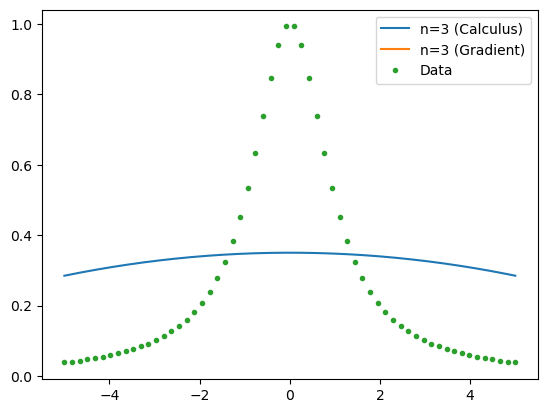

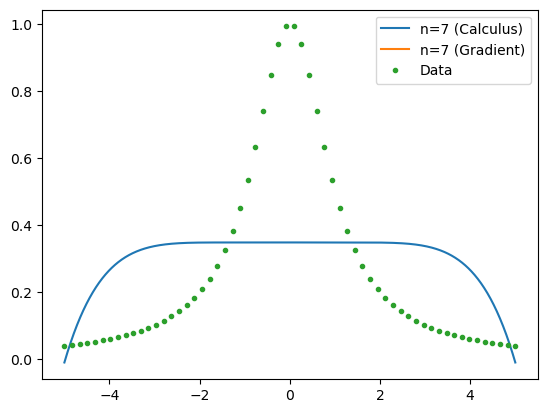

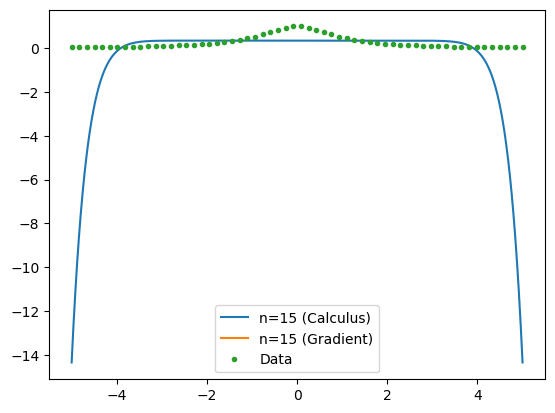

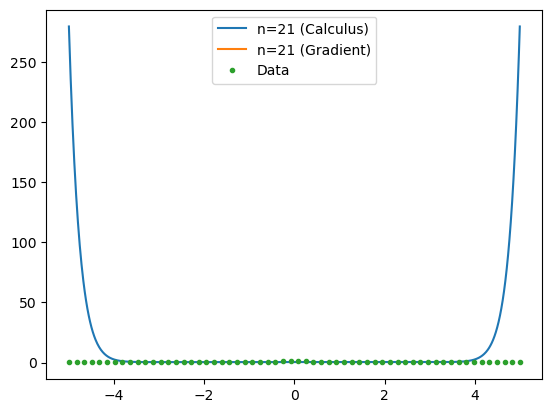

In [18]:
for i, degree in enumerate(degrees):
    y_range_calculus = np.polyval(polynomials_calculus[i], (x_range - x_mean) / x_std) * y_std + y_mean
    y_range_gradient = np.polyval(polynomials_gradient[i], (x_range - x_mean) / x_std) * y_std + y_mean
    plt.figure()
    plt.plot(x_range, y_range_calculus, label=f'n={degree} (Calculus)')
    plt.plot(x_range, y_range_gradient, label=f'n={degree} (Gradient)')
    plt.plot(x, y, '.', label='Data')
    plt.legend()
    plt.show()